In [1]:
import pickle

#file = open("./geoid_to_crimecount.pickle", "rb")
#dict = pickle.load(file)
#counts = list(dict.values())
#counts = [x + 0.00001 for x in counts] #Add offset to allow for log transformation later (ensure no values are 0)

In [2]:
import geoid_income_utils

counts = geoid_income_utils.getIncomes()
print(counts[1])
counts.sort()

128171.0


In [4]:
import numpy as np
import math
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import Counter

import pandas as pd
from collections import defaultdict
#import bin_to_folder as b2f

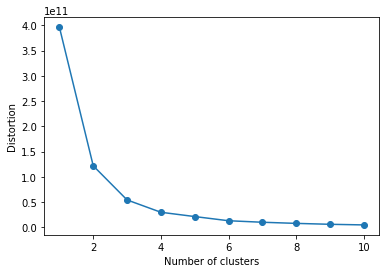

In [5]:
counts_np = np.asarray(counts)
#counts_np = np.log(counts_np)
counts_np = counts_np.reshape((-1, 1))


distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(counts_np)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [6]:
#Perform 2-Means Clustering
km = KMeans(n_clusters = 2, random_state = 0)
km.fit(counts_np)
y = km.predict(counts_np)
cluster_counts = Counter(y)
print(cluster_counts)

curr_count = 0
cutoffs = []
for i in range(2):
    curr_count += cluster_counts[i]
    cutoffs.append(counts[curr_count - 1])
print("2-Means Clustering Cutoffs:")
print(cutoffs)

Counter({1: 144, 0: 58})
2-Means Clustering Cutoffs:
[35486.0, 210667.0]


In [7]:
#Percentiles using 2-Means Clustering
total = sum(cluster_counts.values())
running_sum = cluster_counts[0]
print("Class 0: " + str(cluster_counts[0]/total * 100) + "% of incomes, " + str(running_sum/total) + " percentile")
running_sum += cluster_counts[1]
print("Class 1: " + str(cluster_counts[1]/total * 100) + "% of incomes, " + str(running_sum/total) + " percentile")

Class 0: 28.71287128712871% of incomes, 0.2871287128712871 percentile
Class 1: 71.28712871287128% of incomes, 1.0 percentile


In [8]:
#Perform 3-Means Clustering
km = KMeans(n_clusters = 3, random_state = 0)
km.fit(counts_np)
y = km.predict(counts_np)
cluster_counts = Counter(y)
print(cluster_counts)

curr_count = 0
cutoffs = []
for i in range(3):
    curr_count += cluster_counts[i]
    cutoffs.append(counts[curr_count - 1])
print("3-Means Clustering Cutoffs:")
print(cutoffs)

Counter({1: 102, 2: 73, 0: 27})
3-Means Clustering Cutoffs:
[26604.0, 75375.0, 210667.0]


In [9]:
#Percentiles using 3-Means Clustering
total = sum(cluster_counts.values())
running_sum = cluster_counts[0]
print("Class 0: " + str(cluster_counts[0]/total * 100) + "% of incomes, " + str(running_sum/total) + " percentile")
running_sum += cluster_counts[1]
print("Class 1: " + str(cluster_counts[1]/total * 100) + "% of incomes, " + str(running_sum/total) + " percentile")
running_sum += cluster_counts[2]
print("Class 2: " + str(cluster_counts[2]/total * 100) + "% of incomes, " + str(running_sum/total) + " percentile")

Class 0: 13.366336633663368% of incomes, 0.13366336633663367 percentile
Class 1: 50.495049504950494% of incomes, 0.6386138613861386 percentile
Class 2: 36.13861386138614% of incomes, 1.0 percentile


In [10]:
#Perform 4-Means Clustering
km = KMeans(n_clusters = 4, random_state = 0)
km.fit(counts_np)
y = km.predict(counts_np)
cluster_counts = Counter(y)
print(cluster_counts)

curr_count = 0
cutoffs = []
for i in range(4):
    curr_count += cluster_counts[i]
    cutoffs.append(counts[curr_count - 1])
print("4-Means Clustering Cutoffs:")
print(cutoffs)

Counter({1: 86, 3: 60, 0: 36, 2: 20})
4-Means Clustering Cutoffs:
[29185.0, 73603.0, 85625.0, 210667.0]


In [11]:
#Percentiles using 4-Means Clustering
total = sum(cluster_counts.values())
running_sum = cluster_counts[0]
print("Class 0: " + str(cluster_counts[0]/total * 100) + "% of incomes, " + str(running_sum/total) + " percentile")
running_sum += cluster_counts[1]
print("Class 1: " + str(cluster_counts[1]/total * 100) + "% of incomes, " + str(running_sum/total) + " percentile")
running_sum += cluster_counts[2]
print("Class 2: " + str(cluster_counts[2]/total * 100) + "% of incomes, " + str(running_sum/total) + " percentile")
running_sum += cluster_counts[3]
print("Class 3: " + str(cluster_counts[3]/total * 100) + "% of incomes, " + str(running_sum/total) + " percentile")

Class 0: 17.82178217821782% of incomes, 0.1782178217821782 percentile
Class 1: 42.57425742574257% of incomes, 0.6039603960396039 percentile
Class 2: 9.900990099009901% of incomes, 0.7029702970297029 percentile
Class 3: 29.7029702970297% of incomes, 1.0 percentile
